# **Music Recommendation System**

## **Milestone 1**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What are we trying to solve using data science?


## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist 

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken to get a feasible solution to the problem. Please note that this is just one way of doing this. **There can be other 'creative' ways to solve the problem, and we encourage you to feel free and explore them as an 'optional' exercise**. 

- In the notebook, there are markdown cells called Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. **Please consider the code provided in this notebook as a sample code.**

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques.

### **Importing Libraries and the Dataset**

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt

# Slightly advanced library for data visualization
import seaborn as sns

# To compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# A dictionary output that does not raise a key error
from collections import defaultdict

# A performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [5]:
# Importing the datasets
count_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/song_data.csv')

### **Understanding the data by viewing a few observations**

In [32]:
# See top 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [33]:
# See top 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [8]:
# See the info of the count_df data
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [9]:
# See the info of the song_df data
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [11]:
# Check the shape of the count_df data
count_df.shape

(2000000, 4)

In [13]:
# Check the shape of the song_df data
song_df.shape

(1000000, 5)

#### **Observations and Insights:_____________**
- The count_df data contains 2,000,000 observations and 4 columns, but the first column ("Unamed:0") is not usefull, there should ony be 3 columns (we will drop the firts column). The firts 2 columns remaining are type "object" and the latest is numeric data type, as it refers to the song count, which makes sense.
- The song_df data contains 1,000,000 observations and 5 columns. All of the data are "object" except the last one that is a numeric data type as it reers to the year. Also there are some null values in both the "title" (15 values) and "release" (5 values) columns.


In [16]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously

song_df.drop_duplicates()
df_merged = pd.merge(count_df,song_df,how = "left", on = "song_id" )

# Drop the column 'Unnamed: 0'
df = df_merged.drop('Unnamed: 0', axis = "columns")

**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [ ]:
# Apply label encoding for "user_id" and "song_id"

# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in columns "user_id" and "song_id"
df["user_id"]= label_encoder.fit_transform(df["user_id"])
df["song_id"]= label_encoder.fit_transform(df["song_id"])
  
# Checking the change
df["user_id"].unique()
df["song_id"].unique()



**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

In [18]:
# Get the column containing the users
users = df.user_id

# Create a dictionary from users to their number of songs
ratings_count = dict()

for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1    

In [19]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_ratings in ratings_count.items():
    
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [20]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary from songs to their number of users
ratings_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1    

In [21]:
# We want our song to be listened by atleast 120 users to be considred
RATINGS_CUTOFF = 120

remove_songs = []

for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

In [ ]:
# Drop records with play_count more than(>) 5 ---> I am not going to do this step as I do not undertand the logic of doing this.
df_final = __________

In [26]:
# Check the info of the data
df_final.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 170214 entries, 209 to 2086699
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      170214 non-null  int64 
 1   song_id      170214 non-null  int64 
 2   play_count   170214 non-null  int64 
 3   title        170214 non-null  object
 4   release      170214 non-null  object
 5   artist_name  170214 non-null  object
 6   year         170214 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 10.4+ MB


## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [28]:
# Display total number of unique user_id
df_final.user_id.unique().size

3477

Total number of unique song id

In [29]:
# Display total number of unique song_id
df_final.song_id.unique().size

695

Total number of unique artists

In [31]:
# Display total number of unique artists
df_final.artist_name.unique().size

258

#### **Observations and Insights:__________**
- The values found when counting the number of unique users (3,477), songs (695) and artists (258) make sense as the artistis numer is the lowest, many of those artists will have one song and others more than one, getting to the 695 songs contained in our dataset. Those songs are then plyed among the 3,477 users the platform has as consumers. 

### **Let's find out about the most interacted songs and interacted users**

In [37]:
df_final.head(10)

,user_id,song_id,play_count,title,release,artist_name,year
209,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
211,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
212,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
213,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
214,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007
215,6958,892,1,Bleeding Hearts,Hell Train,Soltero,0
218,6958,1050,5,Wet Blanket,Old World Underground_ Where Are You Now?,Metric,2003
222,6958,1480,1,Fast As I Can,Monday Morning Cold,Erin McKeown,2000
224,6958,1671,2,Sleeping In (Album),Give Up,Postal Service,2003
225,6958,1752,1,Gimme Sympathy,Gimme Sympathy,Metric,2009


Most interacted songs ("song_id" withe the highest "play_count")

In [48]:
# Calculate the count of "play_count" for each "song-id"
df1 = df_final.groupby('song_id').sum()['play_count']

# Sort the dataframe in descending order
df1 = df1.sort_values(ascending=False)

# See the first five records the dataset
df1.head(10)


song_id
317     5894
8582    5532
614     5474
352     4958
7416    4861
2220    4510
6246    4202
1664    4127
5531    4027
6293    3408
Name: play_count, dtype: int64

Most interacted users ("user_id" with the highest "play count")

In [49]:
# Calculate the count of "play_count" for each "song-id"
df2 = df_final.groupby('user_id').sum()['play_count']

# Sort the dataframe in descending order
df2 = df2.sort_values(ascending=False)

# See the first five records of  the dataset
df2.head(10)

user_id
22588    4657
3237     2837
2403     1327
31692    1157
62759    1130
32542    1064
32364    1037
60305    1027
31704     975
1041      919
Name: play_count, dtype: int64

#### **Observations and Insights:_______**
- The most interactive song has been played 5,894 times, while the tenth has been played 3,408 times.
- The mos interactive user has played 4,657 songs, while the fith has played 919 songs. the two top users could be considered "outliers".
- The previous two bullet-points indicate us that there is a huge difference between the the users in terms of how many songs they play in the same period, vs the most interactive songs, which numbers are not as sread out.




Songs played in a year

In [50]:
count_songs = df_final.groupby('year').count()['title']

count = pd.DataFrame(count_songs)

count.drop(count.index[0], inplace = True)

count.tail()

,title
year,
2006,10255
2007,18669
2008,20195
2009,21811
2010,6097


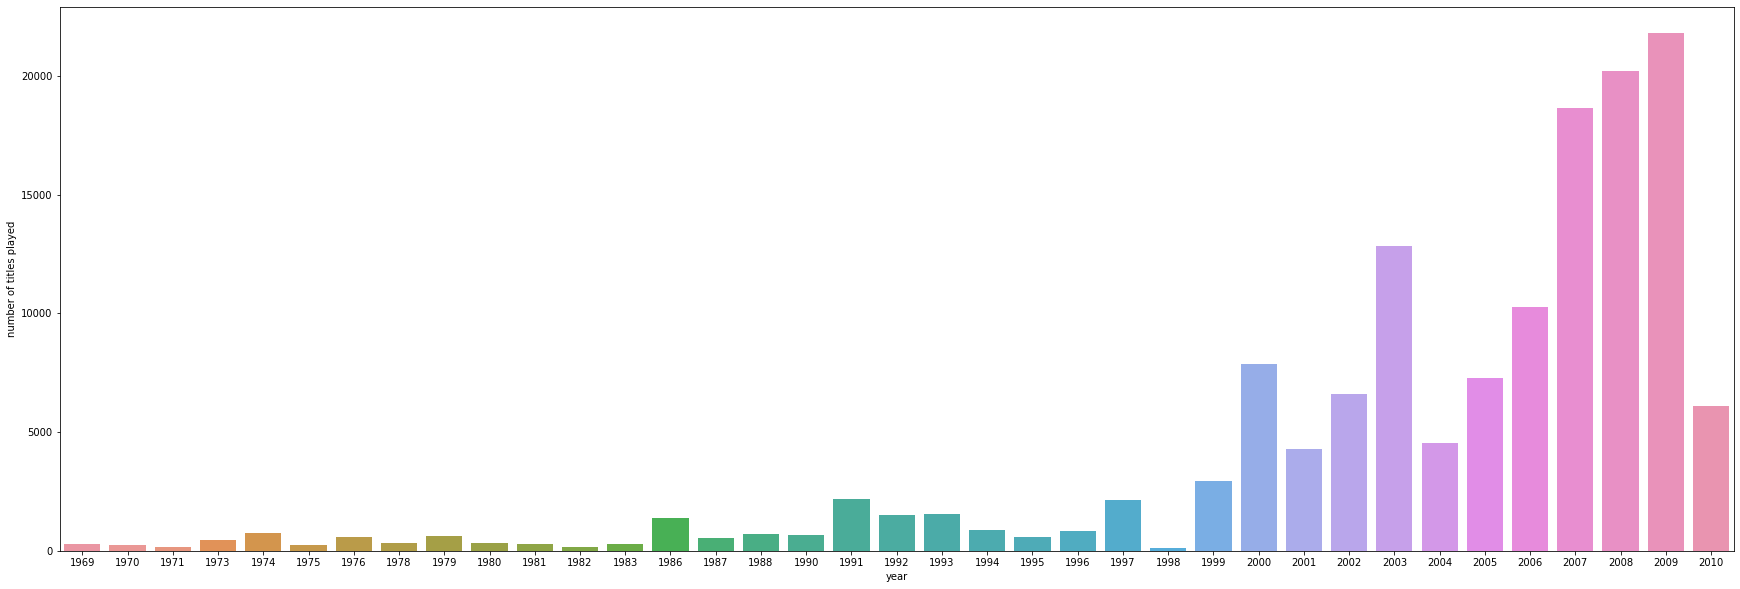

In [51]:
# Create the plot

# Set the figure size
plt.figure(figsize = (30, 10))

sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median)

# Set the y label of the plot
plt.ylabel('number of titles played') 

# Show the plot
plt.show()

#### **Observations and Insights:__________** # 
- The assumption we are making here is that the dataset provided is of all the univer of users and songs playd in the platform, so that out data set is not a subset of the universal dataset of usage of the platform. 

- Because the previous graph represents the total of "songs played", which equals to the (most likely) the most important variable that determines the revenue gotten by the platform (more songs played = more advertising money). This asumes that most Spotify users are not "pay users" that do not get advertising.

- However, the revenue can also be determined by the number of users, especially if the % of "pay users" is important (which we do not know). In this case, the number of songs played would not be as important to the platform in terms of revenue.

- However because we can understand that in any case (wether "pay users" represent and important part of the platform or not), the number of  songs played is an important KPI, wether in terms of revenue or in terms of customer satisfaction with the plaform (eg. a "pay user" that does not use the platform will most likely leave stop paying at some point). It is important in any case to notice that the number of songs have had an steady increase excluding the years 1998, 2001, 2004 and 2010. It is important to understand the causes of these 4 drops: was it for regulation reasons?, was it due to a new competitor that entering the market?, was it due to the fact that a especific music label refused to let it's music play in the platform?, was it due to any other reason?

- It is also worth mention that it makes sense to focus our recommendation system on the most recent data as taste in music can change over the years. The good news is that most of out data is concentrated in the last years.


## **Proposed approach**
**Potential techniques:** What different techniques should be explored?<br>
**Overall solution design:** What is the potential solution design?<br>
**Measures of success:** What are the key measures of success to compare different potential technqiues?<br>